# Isolation Forest

*For Anomaly Detection*

In [48]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier

In [49]:
path = 'resources/pacemed/'
df = pd.read_csv(path+'cleaned.csv',index_col=None, sep=',')
df['bad_discharge'] = df['bad_discharge'].astype('int')
df.head()

,primary_key,blood_pressure,respiration_rate,temperature,age,days_ICU,bad_discharge
0,0-2016-01-05,133.367285,3.331333,35.746152,35.0,2.0,0
1,1-2014-07-04,127.878761,5.333333,37.133845,77.0,2.0,0
2,10-2015-07-02,109.261078,5.775556,37.405126,50.0,3.0,0
3,100-2014-06-28,128.925084,6.390000,36.293589,41.0,1.0,0
4,1000-2014-11-30,118.448189,8.975610,37.572649,79.0,2.0,0


In [86]:
Data = df.iloc[:,1:df.shape[1]-1].values
Target = df['bad_discharge'].values
X_train, X_test, y_train, y_test = train_test_split(Data, Target, test_size=0.20, random_state=0, stratify=Target)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

clf = IsolationForest(behaviour='new', max_samples=100,max_features=1.,
                      random_state=42, contamination='auto')

rfc = RandomForestClassifier(n_estimators=1000, random_state=42, )
clf.fit(X_train)
rfc.fit(X_train,y_train)

y_pred_iso = clf.predict(X_test)
y_pred_rfc = rfc.predict(X_test)


Training Features Shape: (1119, 5)
Training Labels Shape: (1119,)
Testing Features Shape: (280, 5)
Testing Labels Shape: (280,)


In [84]:
y_test_new = []
for yt in y_test.tolist():
    if yt==0:
        y_test_new.append('Good')
    else:
        y_test_new.append('Bad')
        
y_pred_new = []
for yt in y_pred_iso.tolist():
    if yt==1:
        y_pred_new.append('Pred_Good')
    else:
        y_pred_new.append('Pred_Bad')
        
data = np.stack((X_test[:, 2], X_test[:,1], y_test_new, y_pred_new)).T
new_df = pd.DataFrame(data, columns=['x', 'y', 'if.act', 'if.pred'])
new_df['x'] = new_df['x'].astype('float')
new_df['y'] = new_df['y'].astype('float')

In [82]:
y_pred_rf = []
for yt in y_pred_rfc.tolist():
    if yt==0:
        y_pred_rf.append('Pred_Good')
    else:
        y_pred_rf.append('Pred_Bad')
        
rf_data = np.stack((X_test[:, 2], X_test[:,1], y_test_new, y_pred_rf)).T
rf_df = pd.DataFrame(rf_data, columns=['x', 'y', 'rf.act', 'rf.pred'])
rf_df['x'] = rf_df['x'].astype('float')
rf_df['y'] = rf_df['y'].astype('float')


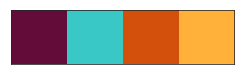

In [74]:
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


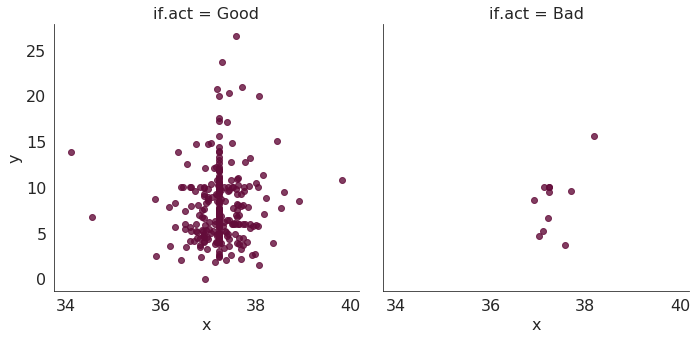

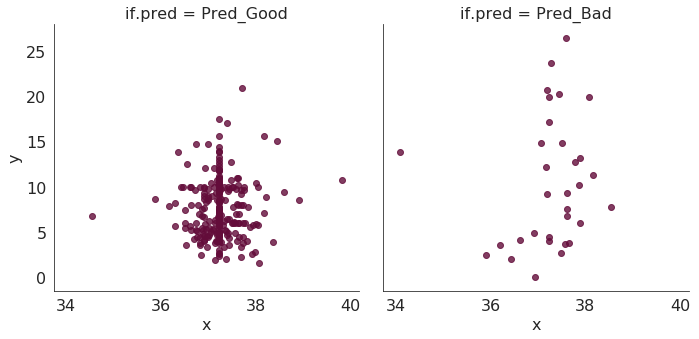

In [87]:
sns.lmplot(data=new_df, x='x', y='y', col='if.act', 
                   fit_reg=False, legend=True, legend_out=True)

sns.lmplot(data=new_df, x='x', y='y', col='if.pred', 
                   fit_reg=False, legend=True, legend_out=True)

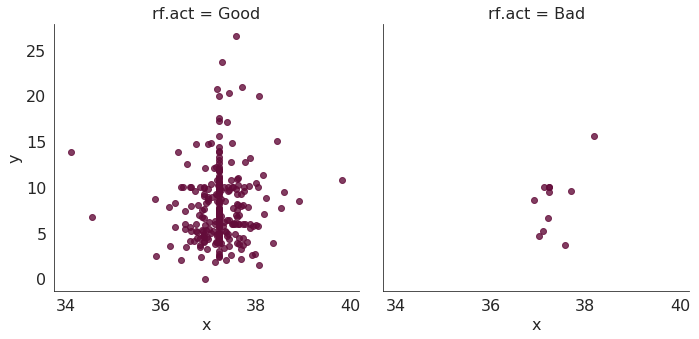

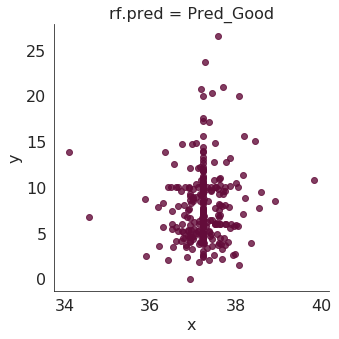

In [88]:
sns.lmplot(data=rf_df, x='x', y='y', col='rf.act', 
                   fit_reg=False, legend=True, legend_out=True)

sns.lmplot(data=rf_df, x='x', y='y', col='rf.pred', 
                   fit_reg=False, legend=True, legend_out=True)
